# Accuracy

정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

- imbalanced 레이블 값 분포에서 적합한 평가 지표가 아니다

## MNIST 예제

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [2]:
class MyFakeClassifier(BaseEstimator) :
    #do nothing
    def fit(self, X,y) :
        pass
    #모두 0으로 예측
    def predict(self, X) :
        return np.zeros((len(X), 1), dtype = bool)

In [3]:
digits = load_digits()

#7이면 True
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 11)

In [4]:
print('label test set shape : ', y_test.shape)
print('test set 0, 1 분포')
print(pd.Series(y_test).value_counts())

label test set shape :  (450,)
test set 0, 1 분포
0    405
1     45
dtype: int64


- 0이 90% 1이 10% 인 분류문제에서 0으로 다 예측해도, 정확도는 90%
- 모델의 성능을 평가하는 적절한 지표라고 할 수 없다.

In [5]:
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)

print('fakeclf의 accuracy : ', accuracy_score(y_test, fakepred))

fakeclf의 accuracy :  0.9


# Confusion Matrix
- TN : 예측값 negative(0) 실제 값 negative(0) [0.0]
- FP : 예측값 positive(1) 실제 값 negative(0) [0.1]
- FN : 예측값 negative(0) 실제 값 positive(1) [1.0]
- TP : 예측값 positive(1) 실제 값 positive(1) [1,1]

In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

# accuracy
$$ accuracy = \frac{TN+TP}{TN+FP+FN+TP} $$

- 불균형한 데이터에서는 부적절한 평가 지표

# precision, recall(sensitivity)

$$ precision = \frac{TP}{FP+TP} $$
- positive로 예측한 값들 중 실제 값이 positive인 비율
- 예측 성능을 더욱 정밀하게 측정하기 위한 평가 지표
- FP를 낮추는 방향으로

$$ recall = \frac{TP}{FN+TP} $$ 
- 실제 값이 positive인 대상 중에 positive로 예측한 비율
- FN을 낮추는 방향으로

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [23]:
def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print('confusion matrix')
    print(confusion)
    
    print('accurcacy : {0:4f}, precision : {1:4f}, sensitivity : {2:4f}'.format(accuracy, precision, recall))

In [18]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

os.listdir('../data/titanic')

['gender_submission.csv', 'test.csv', 'train.csv']

## titanic example

In [17]:
titanic = pd.read_csv('../data/titanic/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
def transform_features(df) :

    #Null 처리 함수
    def fillna(df) :
        df['Age'].fillna(df.Age.mean(), inplace = True)
        df['Cabin'].fillna('N', inplace = True)
        df['Embarked'].fillna('N', inplace = True)
        df['Fare'].fillna(0, inplace = True)

        return df

    # 불필요한 속성 제거
    def drop_features(df) :
        df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)

        return df

    # label encoding
    def format_features(df) :
        df['Cabin'] = df['Cabin'].str[:1]
        features = ['Cabin','Sex','Embarked']

        for feature in features :
            le = LabelEncoder()
            le = le.fit(df[feature])
            df[feature] = le.transform(df[feature])

        return df

    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [21]:
Y_titanic = titanic['Survived']

X_titanic = titanic.drop('Survived', axis = 1)
X_titanic = transform_features(X_titanic)

X_train, X_test, y_train, y_test = train_test_split(X_titanic, Y_titanic, test_size = 0.2, random_state = 11)

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)
pred = lr.predict(X_test)
get_clf_eval(y_test, pred)

confusion matrix
[[108  10]
 [ 14  47]]
accurcacy : 0.865922, precision : 0.824561, sensitivity : 0.770492


precision에 비해 recall이 낮게 나옴.

## precision / recall tradeoff
- 정밀도 또는 재현율이 특별히 강조돼야 할 경우 threshold를 조정해 수치를 높일 수 있다.
- 상호 보완적인 평가 지표. 하나를 높이면, 다른 하나의 수치는 떨어지기 쉬움

### predict_proba() : 학습이 완료된 classifier객체에서 호출이 간으. 개별 클래스 예측확률 출력

In [33]:
pred_proba = lr.predict_proba(X_test)

print('pred proba 결과 shape: ', pred_proba.shape)
print(pred_proba[:3])

pred proba 결과 shape:  (179, 2)
[[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429645 0.13570355]]


In [35]:
# 예측된 확률 중 확률이 더큰 값으로 예측
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis = 1)
pred_proba_result[:3]

array([[0.44935228, 0.55064772, 1.        ],
       [0.86335513, 0.13664487, 0.        ],
       [0.86429645, 0.13570355, 0.        ]])

### Binarizer : 이용하면 threshold보다 크면 1, 작거나 같으면 0

In [39]:
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]

binarizer = Binarizer(threshold = 1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


- classifier의 경우, pred_proba를 통해 class별 속할 확률을 구한 후, threshold기준으로 Binarizer class를 적용해 최종 예측값을 구하는 방식. threshold를 조정하면, 지표들이 달라질 수 있음

### threshold

In [42]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:, 1].reshape(-1,1) #1에 속할 확률만

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix
[[108  10]
 [ 14  47]]
accurcacy : 0.865922, precision : 0.824561, sensitivity : 0.770492


In [43]:
custom_threshold = 0.4

pred_proba_1 = pred_proba[:, 1].reshape(-1,1) #1에 속할 확률만

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix
[[97 21]
 [11 50]]
accurcacy : 0.821229, precision : 0.704225, sensitivity : 0.819672


- threshold를 낮추면, positive예측을 너그럽게
- True값이 많아짐.
- recall값이 높아짐. precision이 낮아짐

In [45]:
thresholds = [0.4,0.45,0.5,0.55,0.60]

def get_eval_by_threshold(y_test, pred_prba_c1, thresholds) :
    
    for custom_threshold in thresholds :
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_prba_c1)
        custom_predict = binarizer.transform(pred_proba_1)
        
        print('threshold ; ', custom_threshold)
        get_clf_eval(y_test, custom_predict)
        print('\n')
        
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)
#0.5일 때와 비교했을 때, accuracy는 별로 안 떨어지지만, sensitivity가 상승한 0.45가 적절.

threshold ;  0.4
confusion matrix
[[97 21]
 [11 50]]
accurcacy : 0.821229, precision : 0.704225, sensitivity : 0.819672


threshold ;  0.45
confusion matrix
[[105  13]
 [ 13  48]]
accurcacy : 0.854749, precision : 0.786885, sensitivity : 0.786885


threshold ;  0.5
confusion matrix
[[108  10]
 [ 14  47]]
accurcacy : 0.865922, precision : 0.824561, sensitivity : 0.770492


threshold ;  0.55
confusion matrix
[[111   7]
 [ 16  45]]
accurcacy : 0.871508, precision : 0.865385, sensitivity : 0.737705


threshold ;  0.6
confusion matrix
[[113   5]
 [ 17  44]]
accurcacy : 0.877095, precision : 0.897959, sensitivity : 0.721311




### precision_recall_curve()
- input : y_true, proba_pred(positive 칼럼의 예측 확률 배열)
- output : precision, recall

In [46]:
from sklearn.metrics import precision_recall_curve

In [47]:
#label1인 경우만
pred_proba_class1 = lr.predict_proba(X_test)[:,1]

precision, recall, threshold = precision_recall_curve(y_test, pred_proba_class1)

In [49]:
#147개의 threshold를 바꿔가면서 진행
print('threshold shape : ', threshold.shape)

threshold shape :  (147,)


In [60]:
#14개 너무 많아서 10건만 추출하되, 임계값을 15step으로 추출

thr_index = np.arange(0, threshold.shape[0], 15)
print('샘플용 10개의 임계값 : ', np.round(threshold[thr_index],2))
print('샘플용 임계값별 정밀도 : ', np.round(precision[thr_index],2))
print('샘플용 임계값별 재현율 : ', np.round(recall[thr_index],2))

샘플용 10개의 임계값 :  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
샘플용 임계값별 정밀도 :  [0.38 0.42 0.45 0.52 0.62 0.68 0.8  0.93 0.96 1.  ]
샘플용 임계값별 재현율 :  [1.   0.97 0.9  0.9  0.9  0.82 0.77 0.66 0.44 0.21]


In [63]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

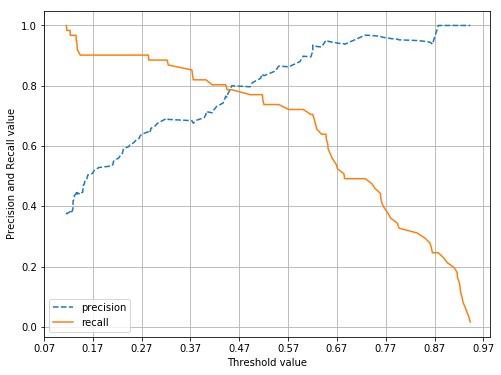

In [71]:
def precision_recall_curve_plot(y_test, pred_proba_c1) :
    
    precision, recall, threshold = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = threshold.shape[0]
    plt.plot(threshold, precision[:threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(threshold, recall[:threshold_boundary], label = 'recall')
    
    #x축의 scale을 0.1단위로
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    
    plt.legend()
    plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr.predict_proba(X_test)[:,1])

- precision 100% : 병에 걸릴 확률이 가장 높은 사람 1명만 positive로 예측한다
- recall 100% : 모든 환자를 positive로 예측.

# f1 score

$$ F1 = \frac{2}{\frac{1}{recall}+\frac{1}{precision}} = 2*\frac{precision*recall}{precision + recall}$$

- 정밀도와 재현율이 차이가 별로 나지 않으면, 값이 커짐

In [72]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, pred)
print('F1 score : ', f1)

F1 score :  0.7966101694915254


In [73]:
thresholds = [0.4,0.45,0.5,0.55,0.60]

def get_clf_eval(y_test, pred) :
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    #f1 score
    f1 = f1_score(y_test, pred)
    print('confusion matrix')
    print(confusion)
    
    print('accurcacy : {0:4f}, precision : {1:4f}, sensitivity : {2:4f}, F1:{3:4f}'.format(accuracy, precision, recall, f1))

In [74]:
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

threshold ;  0.4
confusion matrix
[[97 21]
 [11 50]]
accurcacy : 0.821229, precision : 0.704225, sensitivity : 0.819672, F1:0.757576


threshold ;  0.45
confusion matrix
[[105  13]
 [ 13  48]]
accurcacy : 0.854749, precision : 0.786885, sensitivity : 0.786885, F1:0.786885


threshold ;  0.5
confusion matrix
[[108  10]
 [ 14  47]]
accurcacy : 0.865922, precision : 0.824561, sensitivity : 0.770492, F1:0.796610


threshold ;  0.55
confusion matrix
[[111   7]
 [ 16  45]]
accurcacy : 0.871508, precision : 0.865385, sensitivity : 0.737705, F1:0.796460


threshold ;  0.6
confusion matrix
[[113   5]
 [ 17  44]]
accurcacy : 0.877095, precision : 0.897959, sensitivity : 0.721311, F1:0.800000




# ROC curve, AUC
- X축 : 1-specifity / Y축 : Sensitivity

## roc_curve()
- input : y_true / y_score(predict_prob()의 positive 예측값
- output : fpr, tpr, thresholds

In [75]:
from sklearn.metrics import roc_curve

In [77]:
pred_proba_class1 = lr.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, pred_proba_class1)

#5step으로 추출
thr_index = np.arange(0, threshold.shape[0], 5)
print('sample 10 thresholds : ', np.round(threshold[thr_index],2))
print('sample FPR : ', np.round(fpr[thr_index],3))
print('sample TPR : ', np.round(tpr[thr_index],3))

sample 10 thresholds :  [1.94 0.87 0.63 0.55 0.44 0.32 0.15 0.14 0.13 0.12]
sample FPR :  [0.    0.008 0.025 0.059 0.127 0.203 0.559 0.602 0.695 0.847]
sample TPR :  [0.    0.246 0.672 0.738 0.787 0.885 0.902 0.951 0.967 0.984]


##  AUC

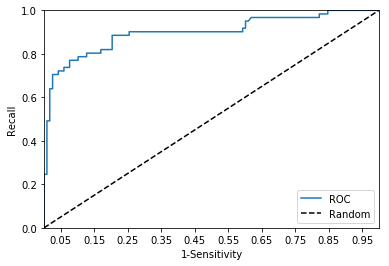

In [78]:
def roc_curve_plot(y_test, pred_proba_c1) :
    
    fpr, tpr, threshold = roc_curve(y_test, pred_proba_c1)
    
    #ROC curve
    plt.plot(fpr, tpr, label = 'ROC')
    #대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    
    plt.xlabel('1-Sensitivity')
    plt.ylabel('Recall')
    
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

In [79]:
from sklearn.metrics import roc_auc_score

pred = lr.predict(X_test)
roc_score = roc_auc_score(y_test, pred)

print('AUC vlaue', roc_score)

AUC vlaue 0.842873020283412
